NAME: AMOOLYA G
USN: 20202AIE0007
MAIL ID1: AMOOLYA.20202AIE0007@PRESIDENCYUNIVERSITY.IN
MAIL ID2: amoolya.g99@gmail.com
BRANCH: ARTIFICIAL INTELLIGENCE

PURPOSE OF PROJECT 1: EXTRACTING THE FEATURES FROM THE RAVDESS AUDIO DATA, ANALYSING THE DATASET, VISUALIZATION OF THE DATASET. OVERALL, EXPLORATORY DATA ANALYSIS ON RAVDESS DATA!

EXTRACTING FEATURES FROM AUDIO FILES IN RAVDESS DATASET

In [ ]:
#importing the neccessary libraries

import glob
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#for loop program to get the emotions from the audio file. 
#this is a labeled dataset, so each value describes each emotion
list1= []
for i in glob.glob("/content/drive/MyDrive/audio_speech_actors_01-24/*"):
  #print(i)
  out = i.split('/')[5]
  for j in glob.glob("/content/drive/MyDrive/audio_speech_actors_01-24/"+out+'/*'):
    print(j)
    abc = j.split('/')[6]
    cvb = abc.split('-')[2]
    list1.append(cvb)
   

/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-03-02-02-01-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-04-01-02-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-01-01-01-01-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-03-01-02-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-02-01-01-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-03-02-02-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-02-01-02-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-02-02-01-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-04-02-01-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-02-01-01-01-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-04-01-02-01-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-03-01-02-01-18.wav
/con

In [ ]:
#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
list1

['03',
 '04',
 '01',
 '03',
 '02',
 '03',
 '02',
 '02',
 '04',
 '02',
 '04',
 '03',
 '04',
 '01',
 '03',
 '04',
 '02',
 '04',
 '02',
 '03',
 '02',
 '01',
 '01',
 '03',
 '02',
 '03',
 '07',
 '05',
 '08',
 '07',
 '04',
 '06',
 '05',
 '08',
 '07',
 '06',
 '06',
 '05',
 '07',
 '07',
 '07',
 '06',
 '04',
 '08',
 '06',
 '08',
 '07',
 '05',
 '05',
 '08',
 '06',
 '05',
 '06',
 '08',
 '07',
 '05',
 '05',
 '08',
 '06',
 '08',
 '02',
 '01',
 '02',
 '02',
 '01',
 '02',
 '02',
 '02',
 '01',
 '02',
 '01',
 '03',
 '02',
 '06',
 '05',
 '06',
 '07',
 '08',
 '03',
 '05',
 '04',
 '08',
 '07',
 '04',
 '03',
 '08',
 '08',
 '03',
 '08',
 '07',
 '03',
 '03',
 '06',
 '06',
 '04',
 '07',
 '07',
 '05',
 '06',
 '04',
 '06',
 '08',
 '08',
 '05',
 '03',
 '07',
 '06',
 '04',
 '08',
 '05',
 '05',
 '06',
 '04',
 '07',
 '03',
 '04',
 '05',
 '07',
 '05',
 '04',
 '01',
 '03',
 '01',
 '02',
 '03',
 '06',
 '06',
 '07',
 '07',
 '02',
 '06',
 '06',
 '05',
 '02',
 '04',
 '01',
 '07',
 '04',
 '06',
 '03',
 '03',
 '05',
 '07',

In [ ]:
#loading the contents in the file to sr(sample rate) and x(samples recorded on just one channel (Mono) over the whole audio)
x, sr = librosa.load('/content/drive/MyDrive/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

In [ ]:
#sr(sample rate) means how many samples are recorded per second.
sr

22050

In [ ]:
#MFFC- Mel Frequency Cepstral Coefficients
#Extracting features which are independent to each other using MFFC and librosa.
mfccs = librosa.feature.mfcc(x, sr=sr, n_mfcc = 120)
print(mfccs.shape)

(120, 143)


In [ ]:
#extracting the mfcc fearures for all the audio files and loading them into the dataframe
df=pd.DataFrame(columns=['feature'])
index=0
#for index, y in enumerate(df):
for i in glob.glob("/content/drive/MyDrive/audio_speech_actors_01-24/*"):
  #print(i)
  out = i.split('/')[5]
  for j in glob.glob("/content/drive/MyDrive/audio_speech_actors_01-24/"+out+'/*'):
    print(j)
    x, sample_rate= librosa.load(j, duration=3, offset=0.5)
    sample_rate=np.array(sample_rate)
    mffcs=np.mean(librosa.feature.mfcc(y=x, n_mfcc=120),axis=0)
    feature=mffcs
    df.loc[index]=[-(feature/100)]
    index=index+1

/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-03-02-02-01-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-04-01-02-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-01-01-01-01-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-03-01-02-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-02-01-01-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-03-02-02-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-02-01-02-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-02-02-01-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-04-02-01-02-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-02-01-01-01-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-04-01-02-01-18.wav
/content/drive/MyDrive/audio_speech_actors_01-24/Actor_18/03-01-03-01-02-01-18.wav
/con

In [ ]:
#dataframe in the form of array
df

,feature
0,"[0.04860399, 0.046916593, 0.046223816, 0.04707..."
1,"[0.070516616, 0.070516616, 0.070516616, 0.0705..."
2,"[0.076304026, 0.0775326, 0.07740155, 0.0774015..."
3,"[0.06817839, 0.06817839, 0.06817839, 0.0681783..."
4,"[0.07314909, 0.07314909, 0.07314909, 0.0731490..."
...,...
1435,"[0.0707943, 0.0707943, 0.0707943, 0.0707943, 0..."
1436,"[0.03911402, 0.039402887, 0.039143108, 0.04003..."
1437,"[0.060719457, 0.060719457, 0.060719457, 0.0607..."
1438,"[0.04607503, 0.045399107, 0.044794742, 0.04646..."


In [ ]:
#converting array to columns
df1 = pd.DataFrame(df['feature'].values.tolist())

In [ ]:
#new dataframe
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,0.034756,...,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504,0.046794,0.051220,0.050888,0.053314,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120
1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,0.052401,...,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153,0.064170,0.064111,0.065628,0.066885,0.068619,0.071368,0.071023,0.070872,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517
2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,0.050809,...,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.076347,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,NaN,NaN
3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,0.049998,...,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178,0.067207,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178
4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,0.041989,...,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510,0.071118,0.074197,0.074169,0.073496,0.071750,0.073301,0.071854,0.072809,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,0.034756,...,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504,0.046794,0.051220,0.050888,0.053314,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120,0.053120
1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,0.052401,...,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153,0.064170,0.064111,0.065628,0.066885,0.068619,0.071368,0.071023,0.070872,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517
2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,0.050809,...,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.076347,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,NaN,NaN
3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,0.049998,...,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178,0.067207,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178
4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,0.041989,...,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510,0.071118,0.074197,0.074169,0.073496,0.071750,0.073301,0.071854,0.072809,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
#dropping columns some columns to get an evenly distributed dataset i.e, some audios do not exhibit all the mfcc features
df2= df1.drop(columns=[129, 128, 127, 126, 125, 124, 123, 121, 120, 122, 119,118,117, 116, 115, 114,113, 112, 111, 110, 109, 108, 107, 106, 105])

In [ ]:
#new dataframe after dropping the columns
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,0.034756,...,0.042057,0.035537,0.035676,0.040558,0.041039,0.041515,0.039094,0.038623,0.040432,0.042160,0.045109,0.045647,0.045397,0.045437,0.045018,0.045309,0.044183,0.045046,0.039891,0.027748,0.023320,0.019979,0.016667,0.012797,0.012528,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504
1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,0.052401,...,0.046209,0.045532,0.042350,0.044208,0.046423,0.048221,0.050919,0.046996,0.046878,0.052049,0.051617,0.052619,0.053739,0.058828,0.054476,0.051314,0.049794,0.045409,0.046280,0.051760,0.051664,0.049244,0.050256,0.048597,0.052073,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153
2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,0.050809,...,0.051738,0.052113,0.052081,0.056094,0.052847,0.052353,0.043928,0.041175,0.044363,0.047832,0.053752,0.057722,0.052671,0.049842,0.048263,0.048656,0.050956,0.056565,0.054829,0.050479,0.049118,0.053782,0.056288,0.059511,0.059183,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402
3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,0.049998,...,0.047357,0.041139,0.041319,0.042771,0.046791,0.049619,0.050014,0.050987,0.054079,0.054373,0.052226,0.050344,0.051335,0.048284,0.048583,0.053307,0.051587,0.046417,0.049225,0.051898,0.050398,0.053561,0.054141,0.057025,0.057245,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178
4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,0.041989,...,0.045010,0.049127,0.049677,0.049290,0.044455,0.044837,0.046969,0.047992,0.050359,0.053768,0.056565,0.050063,0.051621,0.054901,0.051335,0.050307,0.053385,0.061673,0.061441,0.060218,0.060027,0.057427,0.055493,0.058945,0.057099,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#converting the list1 contents to a dataframe
df = DataFrame(list1,columns=['Emotions'])

In [ ]:
#emotions column= target column
df

,Emotions
0,03
1,04
2,01
3,03
4,02
...,...
1435,08
1436,06
1437,08
1438,06


In [ ]:
df3=df

In [ ]:
df4=df2

In [ ]:
#concatenating two dataframes
result = pd.concat([df2, df], axis=1)

In [ ]:
#displaying the concatenated dataframe along with the target column
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,Emotions
0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,0.034756,...,0.035537,0.035676,0.040558,0.041039,0.041515,0.039094,0.038623,0.040432,0.042160,0.045109,0.045647,0.045397,0.045437,0.045018,0.045309,0.044183,0.045046,0.039891,0.027748,0.023320,0.019979,0.016667,0.012797,0.012528,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504,03
1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,0.052401,...,0.045532,0.042350,0.044208,0.046423,0.048221,0.050919,0.046996,0.046878,0.052049,0.051617,0.052619,0.053739,0.058828,0.054476,0.051314,0.049794,0.045409,0.046280,0.051760,0.051664,0.049244,0.050256,0.048597,0.052073,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153,04
2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,0.050809,...,0.052113,0.052081,0.056094,0.052847,0.052353,0.043928,0.041175,0.044363,0.047832,0.053752,0.057722,0.052671,0.049842,0.048263,0.048656,0.050956,0.056565,0.054829,0.050479,0.049118,0.053782,0.056288,0.059511,0.059183,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402,01
3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,0.049998,...,0.041139,0.041319,0.042771,0.046791,0.049619,0.050014,0.050987,0.054079,0.054373,0.052226,0.050344,0.051335,0.048284,0.048583,0.053307,0.051587,0.046417,0.049225,0.051898,0.050398,0.053561,0.054141,0.057025,0.057245,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178,03
4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,0.041989,...,0.049127,0.049677,0.049290,0.044455,0.044837,0.046969,0.047992,0.050359,0.053768,0.056565,0.050063,0.051621,0.054901,0.051335,0.050307,0.053385,0.061673,0.061441,0.060218,0.060027,0.057427,0.055493,0.058945,0.057099,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#saving the dataframe as csv file
result.to_csv("amoolya.csv")

EDA WITHOUT DROPPING HIGHLY CORRELATED COLUMNS!

In [ ]:
#reading the csv file and storing it in a dataframe
dataset= pd.read_csv(r'/content/amoolya.csv')
dataset

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,Emotions
0,0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,...,0.035537,0.035676,0.040558,0.041039,0.041515,0.039094,0.038623,0.040432,0.042160,0.045109,0.045647,0.045397,0.045437,0.045018,0.045309,0.044183,0.045046,0.039891,0.027748,0.023320,0.019979,0.016667,0.012797,0.012528,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504,3
1,1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,...,0.045532,0.042350,0.044208,0.046423,0.048221,0.050919,0.046996,0.046878,0.052049,0.051617,0.052619,0.053739,0.058828,0.054476,0.051314,0.049794,0.045409,0.046280,0.051760,0.051664,0.049244,0.050256,0.048597,0.052073,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153,4
2,2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,...,0.052113,0.052081,0.056094,0.052847,0.052353,0.043928,0.041175,0.044363,0.047832,0.053752,0.057722,0.052671,0.049842,0.048263,0.048656,0.050956,0.056565,0.054829,0.050479,0.049118,0.053782,0.056288,0.059511,0.059183,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402,1
3,3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,...,0.041139,0.041319,0.042771,0.046791,0.049619,0.050014,0.050987,0.054079,0.054373,0.052226,0.050344,0.051335,0.048284,0.048583,0.053307,0.051587,0.046417,0.049225,0.051898,0.050398,0.053561,0.054141,0.057025,0.057245,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178,3
4,4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,...,0.049127,0.049677,0.049290,0.044455,0.044837,0.046969,0.047992,0.050359,0.053768,0.056565,0.050063,0.051621,0.054901,0.051335,0.050307,0.053385,0.061673,0.061441,0.060218,0.060027,0.057427,0.055493,0.058945,0.057099,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#finding sum of null values in the dataset
dataset.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
             ..
101           0
102           0
103           0
104           0
Emotions      0
Length: 107, dtype: int64

In [ ]:
#dropping the unnamed: 0 column from the dataset
dataset=dataset.drop(['Unnamed: 0'], axis=1)

In [ ]:
#dataframe after dropping the unnamed: 0 column
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,Emotions
0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,0.034756,...,0.035537,0.035676,0.040558,0.041039,0.041515,0.039094,0.038623,0.040432,0.042160,0.045109,0.045647,0.045397,0.045437,0.045018,0.045309,0.044183,0.045046,0.039891,0.027748,0.023320,0.019979,0.016667,0.012797,0.012528,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504,3
1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,0.052401,...,0.045532,0.042350,0.044208,0.046423,0.048221,0.050919,0.046996,0.046878,0.052049,0.051617,0.052619,0.053739,0.058828,0.054476,0.051314,0.049794,0.045409,0.046280,0.051760,0.051664,0.049244,0.050256,0.048597,0.052073,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153,4
2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,0.050809,...,0.052113,0.052081,0.056094,0.052847,0.052353,0.043928,0.041175,0.044363,0.047832,0.053752,0.057722,0.052671,0.049842,0.048263,0.048656,0.050956,0.056565,0.054829,0.050479,0.049118,0.053782,0.056288,0.059511,0.059183,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402,1
3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,0.049998,...,0.041139,0.041319,0.042771,0.046791,0.049619,0.050014,0.050987,0.054079,0.054373,0.052226,0.050344,0.051335,0.048284,0.048583,0.053307,0.051587,0.046417,0.049225,0.051898,0.050398,0.053561,0.054141,0.057025,0.057245,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178,3
4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,0.041989,...,0.049127,0.049677,0.049290,0.044455,0.044837,0.046969,0.047992,0.050359,0.053768,0.056565,0.050063,0.051621,0.054901,0.051335,0.050307,0.053385,0.061673,0.061441,0.060218,0.060027,0.057427,0.055493,0.058945,0.057099,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
#finding the correlation of the dataset
dataset.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,Emotions
0,1.000000,0.979211,0.932864,0.905441,0.887772,0.870122,0.859637,0.840827,0.828379,0.820166,0.810536,0.804021,0.807642,0.805434,0.786725,0.772821,0.770635,0.764040,0.755528,0.738826,0.699008,0.631788,0.624510,0.634547,0.635014,0.624877,0.610776,0.605568,0.609748,0.621605,0.624655,0.622905,0.625123,0.630914,0.625971,0.623825,0.617152,0.607523,0.602146,0.598216,...,0.567986,0.573320,0.571731,0.567215,0.569553,0.568292,0.571134,0.579909,0.576518,0.578201,0.574911,0.573395,0.572914,0.571883,0.572042,0.569596,0.568576,0.576203,0.584611,0.579238,0.568504,0.566260,0.568576,0.570709,0.564658,0.570015,0.575596,0.581681,0.582570,0.582235,0.584051,0.586288,0.588553,0.585206,0.581283,0.583955,0.579368,0.578779,0.581644,-0.159662
1,0.979211,1.000000,0.973059,0.937168,0.913015,0.892896,0.878258,0.860287,0.847486,0.839861,0.829729,0.822401,0.823429,0.820782,0.804207,0.789551,0.784306,0.778034,0.769224,0.753411,0.715015,0.647851,0.640510,0.648390,0.647911,0.636379,0.620371,0.614148,0.618120,0.629936,0.634751,0.634760,0.639177,0.645119,0.641703,0.640471,0.635701,0.624629,0.617863,0.613712,...,0.573240,0.579211,0.576478,0.570245,0.573839,0.572840,0.575967,0.585376,0.582189,0.581452,0.577141,0.575427,0.571032,0.567049,0.568126,0.568031,0.566514,0.572329,0.581564,0.577874,0.565565,0.562461,0.565575,0.568901,0.563286,0.566444,0.569872,0.576077,0.576407,0.577241,0.581202,0.586580,0.591620,0.591759,0.587901,0.588684,0.583460,0.582764,0.587491,-0.156089
2,0.932864,0.973059,1.000000,0.976174,0.940559,0.915034,0.898236,0.882088,0.867609,0.855403,0.844033,0.834820,0.831725,0.827173,0.813935,0.799929,0.790050,0.783574,0.775372,0.759897,0.721648,0.654168,0.646282,0.653242,0.652817,0.639748,0.622730,0.616762,0.622203,0.631605,0.636423,0.638485,0.645114,0.648783,0.641688,0.639375,0.635522,0.623275,0.617522,0.615668,...,0.576228,0.583055,0.578391,0.569924,0.573124,0.573329,0.577575,0.586759,0.584525,0.583339,0.580560,0.578015,0.570391,0.564889,0.565267,0.565918,0.563314,0.568156,0.576805,0.574613,0.563591,0.562280,0.564792,0.567958,0.564290,0.568725,0.571418,0.577126,0.578662,0.579159,0.581668,0.588548,0.594420,0.595021,0.592447,0.593708,0.588298,0.586820,0.592524,-0.158897
3,0.905441,0.937168,0.976174,1.000000,0.973563,0.939584,0.919215,0.901605,0.884916,0.868426,0.853297,0.841615,0.838177,0.832442,0.819603,0.805243,0.793977,0.787948,0.777581,0.761035,0.724054,0.657130,0.649351,0.656855,0.656884,0.643022,0.626091,0.620658,0.626916,0.638161,0.643215,0.646697,0.651190,0.653253,0.644459,0.641195,0.634818,0.623130,0.617971,0.616908,...,0.581687,0.587066,0.580934,0.575285,0.577877,0.578937,0.581634,0.590080,0.587696,0.587045,0.583687,0.580246,0.574276,0.570761,0.568869,0.568719,0.569344,0.577285,0.584269,0.578843,0.568068,0.565529,0.567684,0.570050,0.566189,0.572983,0.576403,0.579834,0.580607,0.582139,0.583543,0.588456,0.593929,0.594325,0.593536,0.594665,0.589899,0.588476,0.593359,-0.160125
4,0.887772,0.913015,0.940559,0.973563,1.000000,0.977283,0.944520,0.918725,0.898038,0.882474,0.867288,0.856702,0.851837,0.844126,0.828534,0.813432,0.799713,0.790515,0.781030,0.762106,0.724021,0.656431,0.648075,0.654543,0.653989,0.641731,0.626029,0.620801,0.625417,0.634470,0.641257,0.646706,0.650333,0.653118,0.643803,0.638684,0.629597,0.617861,0.611973,0.613732,...,0.579120,0.586455,0.579901,0.574376,0.576272,0.575485,0.576934,0.582707,0.578433,0.578388,0.573070,0.567962,0.565991,0.564731,0.563920,0.565216,0.566071,0.573099,0.578570,0.573062,0.560939,0.557072,0.559152,0.559995,0.555371,0.563323,0.566028,0.569464,0.571997,0.573443,0.576702,0.581990,0.587772,0.590037,0.587515,0.586346,0.582695,0.582128,0.586424,-0.165000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
#describing the dataset(mean, standard deviation, min, 25%, 50%, 75%, max)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,Emotions
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,...,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,0.057070,0.056506,0.056455,0.056403,0.056272,0.056174,0.056096,0.055954,0.055767,0.055631,0.055537,0.055480,0.055385,0.055244,0.055272,0.055308,0.055048,0.054471,0.053827,0.052832,0.050783,0.044751,0.038829,0.036346,0.035822,0.035736,0.036005,0.036292,0.036803,0.037406,0.038132,0.038552,0.038786,0.038835,0.038632,0.038436,0.038190,0.037936,0.037646,0.037386,...,0.038168,0.038240,0.038516,0.038712,0.038843,0.038871,0.039032,0.039231,0.039327,0.039432,0.039631,0.039912,0.039987,0.040211,0.040469,0.040762,0.040980,0.041235,0.041495,0.041791,0.042191,0.042541,0.042938,0.043376,0.043655,0.044059,0.044490,0.044885,0.045242,0.045617,0.045840,0.046226,0.046725,0.047259,0.047771,0.048181,0.048617,0.048913,0.049276,4.733333
std,0.010935,0.010953,0.010877,0.010945,0.010961,0.011051,0.011140,0.011240,0.011369,0.011344,0.011273,0.011308,0.011428,0.011602,0.011670,0.011713,0.011879,0.012043,0.012154,0.012099,0.012179,0.012685,0.012890,0.013355,0.013595,0.013548,0.013519,0.013239,0.013062,0.012673,0.012127,0.011721,0.011431,0.011166,0.011092,0.011085,0.011346,0.011498,0.011740,0.011842,...,0.011584,0.011691,0.011741,0.011549,0.011506,0.011398,0.011403,0.011443,0.011466,0.011397,0.011322,0.011253,0.011323,0.011488,0.011536,0.011630,0.011639,0.011806,0.012011,0.012181,0.012223,0.012242,0.012298,0.012466,0.012632,0.012768,0.012814,0.012831,0.013013,0.013293,0.013395,0.013440,0.013303,0.013141,0.013003,0.013062,0.013099,0.013080,0.013099,2.175356
min,0.010080,0.012955,0.010739,0.013786,0.017033,0.015524,0.014289,0.015495,0.016616,0.015962,0.017285,0.018372,0.018563,0.018384,0.018154,0.013838,0.012858,0.015861,0.012949,0.013585,0.006853,-0.002126,-0.006289,-0.010295,-0.012831,-0.013641,-0.013741,-0.012334,-0.011550,-0.008074,-0.007191,-0.009269,-0.005283,-0.013301,-0.013956,-0.014077,-0.010580,-0.008442,-0.011755,-0.014753,...,-0.014130,-0.014770,-0.013519,-0.013043,-0.009571,-0.010417,-0.010940,-0.003701,-0.006286,-0.007033,-0.002525,-0.005431,-0.007714,-0.008321,-0.007489,-0.006894,-0.006938,-0.003792,-0.009142,-0.010995,-0.008618,-0.011129,-0.014028,-0.011880,-0.008792,-0.012577,-0.011679,-0.005340,-0.002995,-0.006014,-0.005943,-0.006958,-0.007629,-0.005720,-0.003376,0.000447,0.002203,0.000172,-0.003900,1.000000
25%,0.049447,0.048876,0.048653,0.048720,0.048728,0.048575,0.048559,0.048615,0.048061,0.047772,0.047796,0.047737,0.047701,0.047168,0.047197,0.047378,0.047155,0.046651,0.046036,0.045391,0.043608,0.037587,0.031837,0.029172,0.028602,0.028679,0.029614,0.030410,0.031038,0.031712,0.032648,0.032890,0.033226,0.033553,0.033127,0.032868,0.032763,0.031774,0.031315,0.031082,...,0.033296,0.033186,0.033400,0.033177,0.033449,0.033751,0.033729,0.033958,0.033892,0.033795,0.033997,0.034288,0.034734,0.034700,0.034804,0.035414,0.035762,0.035877,0.036163,0.036

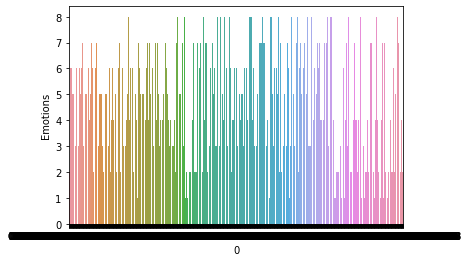

In [ ]:
#bar plot using seaborn for one column '0' and the target column'Emotions'
sns.barplot(data= dataset, x='0',y='Emotions')

In [ ]:
#finding the skewness of the dataset
dataset.skew(axis=0)

0          -0.056500
1           0.003257
2           0.008319
3           0.006748
4           0.011172
              ...   
101        -0.582822
102        -0.571996
103        -0.645853
104        -0.683068
Emotions   -0.045226
Length: 106, dtype: float64

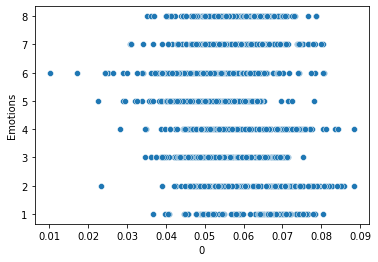

In [ ]:
#scatter plot using seaborn for column '0' and target column 'Emotions'
sns.scatterplot(data=dataset, x='0', y='Emotions')

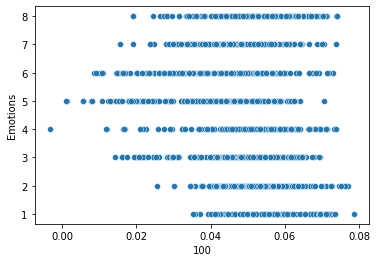

In [ ]:
#scatter plot using seaborn for column '100' and target column 'Emotions'
sns.scatterplot(data=dataset, x='100', y='Emotions')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


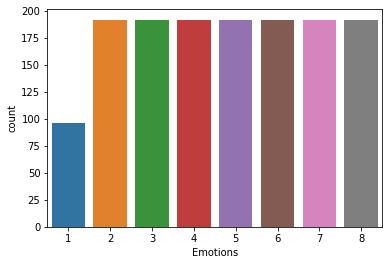

In [ ]:
#count plot for the target column for visualizing the distributions in the emotions
#01 i.e, neutral is least distributed and rest all emotions are equally distributed
sns.countplot('Emotions', data= dataset)
plt.show()

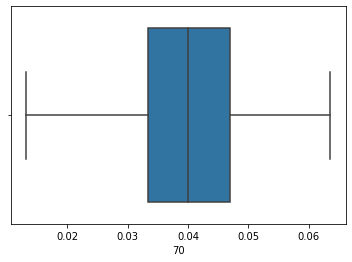

In [ ]:
#box plot for various columns using seaborn
sns.boxplot(data=df, x='70')

In [ ]:
#dropping the target column from the dataset and storing it in a new dataframe
df= dataset.drop(['Emotions'], axis=1)

In [ ]:
#listing each columns in the dataset and storing it in 'col'
col=df.columns

In [ ]:
#outlier treatment for every column in dataset using for loop
for j in col:
  q3= df[j].quantile(0.75)
  q1= df[j].quantile(0.25)
  iqr= q3-q1
  ub= q3+1.5*iqr
  lb= q1-1.5*iqr

  df.loc[df[j] > ub, j] = ub
  df.loc[df[j] < lb, j] = lb

In [ ]:
#printing upper bound(ub) and lower bound(lb)
print(ub)
print(lb)

0.08744707982987165
0.02664769720286131


In [ ]:
#storing the original dataset in a new dataframe 'c'
c= dataset

In [ ]:
#dropping the target column and storing it in new dataset 'x'
#creating a new dataframe 'y' which contains the target column only
x= dataset.drop('Emotions', 1)
y= dataset.Emotions

In [ ]:
#output of the dataframe after dropping the target column
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.048604,0.046917,0.046224,0.047072,0.049290,0.049873,0.050472,0.048150,0.049686,0.051999,0.051157,0.052178,0.053384,0.051440,0.052336,0.053095,0.053420,0.052964,0.053120,0.053120,0.050847,0.043273,0.039369,0.030132,0.026388,0.027664,0.035403,0.036959,0.034249,0.032359,0.035431,0.031136,0.029000,0.026862,0.027110,0.034301,0.037890,0.036831,0.036139,0.034756,...,0.042057,0.035537,0.035676,0.040558,0.041039,0.041515,0.039094,0.038623,0.040432,0.042160,0.045109,0.045647,0.045397,0.045437,0.045018,0.045309,0.044183,0.045046,0.039891,0.027748,0.023320,0.019979,0.016667,0.012797,0.012528,0.011458,0.015750,0.018857,0.023482,0.032036,0.029649,0.029500,0.035279,0.037167,0.035057,0.035728,0.036286,0.036817,0.039406,0.042504
1,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070820,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070517,0.070390,0.069623,0.067248,0.064336,0.049413,0.040677,0.041117,0.045219,0.047681,0.050785,0.047997,0.048105,0.049128,0.051151,0.055581,0.055844,0.052594,0.048667,0.048448,0.049332,0.050532,0.050389,0.052401,...,0.046209,0.045532,0.042350,0.044208,0.046423,0.048221,0.050919,0.046996,0.046878,0.052049,0.051617,0.052619,0.053739,0.058828,0.054476,0.051314,0.049794,0.045409,0.046280,0.051760,0.051664,0.049244,0.050256,0.048597,0.052073,0.054853,0.054794,0.055284,0.051647,0.052953,0.054660,0.056156,0.058494,0.059817,0.061482,0.058099,0.060554,0.063959,0.064369,0.062153
2,0.076304,0.077533,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.077402,0.072013,0.072427,0.076826,0.067054,0.064041,0.067579,0.068436,0.064690,0.065965,0.064361,0.055440,0.053429,0.051646,0.050762,0.049333,0.046499,0.049047,0.052845,0.056021,0.053898,0.052190,0.052463,0.049915,0.049967,0.052342,0.050594,0.052824,0.054405,0.049366,0.050809,...,0.051738,0.052113,0.052081,0.056094,0.052847,0.052353,0.043928,0.041175,0.044363,0.047832,0.053752,0.057722,0.052671,0.049842,0.048263,0.048656,0.050956,0.056565,0.054829,0.050479,0.049118,0.053782,0.056288,0.059511,0.059183,0.061141,0.060678,0.062784,0.064004,0.060744,0.061739,0.067151,0.067728,0.069109,0.072873,0.068966,0.071827,0.077402,0.077675,0.077402
3,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068178,0.068168,0.066622,0.062703,0.061603,0.060335,0.062645,0.051686,0.045906,0.046529,0.045274,0.047479,0.045697,0.045946,0.047125,0.047197,0.051372,0.049034,0.045247,0.043581,0.042868,0.045395,0.048936,0.048892,0.049722,0.049998,...,0.047357,0.041139,0.041319,0.042771,0.046791,0.049619,0.050014,0.050987,0.054079,0.054373,0.052226,0.050344,0.051335,0.048284,0.048583,0.053307,0.051587,0.046417,0.049225,0.051898,0.050398,0.053561,0.054141,0.057025,0.057245,0.058095,0.058611,0.057412,0.056369,0.058307,0.059301,0.059802,0.062534,0.063402,0.064510,0.065389,0.064173,0.065121,0.068654,0.068178
4,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073149,0.073299,0.072838,0.069073,0.070090,0.061194,0.054502,0.057259,0.057319,0.056245,0.055257,0.052835,0.048918,0.052456,0.051311,0.050145,0.048227,0.049272,0.049652,0.047528,0.048320,0.045066,0.038262,0.038456,0.045837,0.041876,0.041989,...,0.045010,0.049127,0.049677,0.049290,0.044455,0.044837,0.046969,0.047992,0.050359,0.053768,0.056565,0.050063,0.051621,0.054901,0.051335,0.050307,0.053385,0.061673,0.061441,0.060218,0.060027,0.057427,0.055493,0.058945,0.057099,0.057157,0.061654,0.061076,0.061411,0.061061,0.060559,0.059386,0.062878,0.066598,0.067304,0.065758,0.065102,0.068988,0.069318,0.069510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
#new dataframe containing the target column
y

0       3
1       4
2       1
3       3
4       2
       ..
1435    8
1436    6
1437    8
1438    6
1439    8
Name: Emotions, Length: 1440, dtype: int64

In [ ]:
#testing the x and y dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.3)

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
106,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.070148,0.069719,0.059019,0.054139,0.053217,0.051049,0.052331,0.050672,0.047682,0.049046,0.048108,0.050962,0.051559,0.049895,0.048890,0.047887,0.048125,0.049002,0.050041,0.056452,0.059675,...,0.070148,0.070148,0.069091,0.060287,0.058640,0.062646,0.069487,0.070148,0.069435,0.068823,0.070449,0.070149,0.067746,0.064279,0.056866,0.054887,0.055399,0.055602,0.050707,0.049079,0.047974,0.045228,0.046276,0.049789,0.052284,0.054998,0.056420,0.052636,0.050413,0.050351,0.052316,0.052231,0.055595,0.057963,0.056480,0.052267,0.054016,0.051540,0.049171,0.049299
1288,0.068809,0.068809,0.068809,0.066163,0.063354,0.066942,0.068809,0.068809,0.068809,0.068809,0.068809,0.068809,0.068809,0.068809,0.068809,0.068809,0.068809,0.066713,0.065436,0.066736,0.058022,0.043299,0.036944,0.038206,0.038885,0.039589,0.043446,0.042522,0.038833,0.038209,0.038715,0.039076,0.044085,0.044283,0.042854,0.042845,0.044884,0.039649,0.037193,0.038927,...,0.043600,0.046768,0.047183,0.045991,0.045273,0.046105,0.043921,0.045122,0.044724,0.045793,0.043034,0.043317,0.043745,0.043364,0.045553,0.050407,0.048324,0.045625,0.043077,0.043292,0.044540,0.045249,0.045837,0.047258,0.049717,0.049109,0.046486,0.045885,0.048698,0.050526,0.048785,0.048242,0.049386,0.051036,0.055577,0.057176,0.056451,0.056941,0.057193,0.056501
864,0.050915,0.051109,0.050625,0.053631,0.054218,0.055950,0.053525,0.051531,0.047748,0.047727,0.047277,0.044115,0.043413,0.046672,0.045640,0.047452,0.044326,0.045715,0.044415,0.046466,0.042604,0.030694,0.025909,0.027664,0.027971,0.029527,0.030956,0.035156,0.039066,0.035868,0.036604,0.039625,0.035469,0.034093,0.034033,0.035329,0.032466,0.028041,0.027717,0.028992,...,0.031756,0.032981,0.030691,0.028626,0.029674,0.030481,0.031188,0.032253,0.032247,0.034515,0.036919,0.035865,0.034112,0.032561,0.035737,0.039641,0.039650,0.037298,0.037860,0.039512,0.038970,0.041336,0.042490,0.044166,0.047406,0.046730,0.043609,0.038471,0.031818,0.028734,0.028077,0.029448,0.029710,0.027491,0.027442,0.028881,0.033493,0.036652,0.036485,0.038678
876,0.043187,0.043548,0.044359,0.043861,0.043090,0.045857,0.047187,0.045600,0.043553,0.045933,0.046537,0.042985,0.039933,0.041721,0.044328,0.044105,0.045611,0.044838,0.046598,0.046930,0.043316,0.038243,0.025969,0.020595,0.021401,0.024682,0.027690,0.033116,0.034248,0.034721,0.034190,0.033320,0.030250,0.029585,0.024689,0.024359,0.025671,0.026574,0.030452,0.030722,...,0.038337,0.038645,0.039706,0.036627,0.031633,0.026543,0.029007,0.030495,0.034761,0.038136,0.038620,0.040443,0.039323,0.039218,0.039975,0.040172,0.040321,0.037951,0.038473,0.041415,0.044024,0.041089,0.042784,0.043373,0.046026,0.045523,0.041233,0.044527,0.047131,0.045106,0.042674,0.045051,0.046834,0.044957,0.042987,0.046171,0.045527,0.046117,0.047317,0.044835
420,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070125,0.070756,0.061835,0.052348,0.044713,0.043991,0.043263,0.045127,0.050946,0.051306,0.052106,0.048699,0.047182,0.049103,0.051145,0.047600,0.047371,0.047834,0.048570,0.052036,0.052005,0.049529,0.048467,...,0.054586,0.056076,0.055050,0.052906,0.051702,0.052136,0.058119,0.060172,0.052743,0.052240,0.050985,0.049377,0.051381,0.049898,0.048062,0.050676,0.052364,0.052539,0.055163,0.054265,0.055214,0.058463,0.062663,0.064316,0.060227,0.056422,0.051342,0.050245,0.052567,0.054892,0.059201,0.064332,0.063861,0.065752,0.068407,0.069856,0.071186,0.069937,0.065896,0.057982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
y_train

106     6
1288    4
864     5
876     5
420     4
       ..
802     2
53      8
350     6
79      5
792     1
Name: Emotions, Length: 1008, dtype: int64

In [ ]:
x_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
1320,0.058525,0.058525,0.058560,0.058609,0.058532,0.058532,0.058525,0.058525,0.058525,0.058525,0.058525,0.058525,0.058525,0.058525,0.058525,0.058525,0.058525,0.058359,0.058162,0.058566,0.055904,0.053259,0.052374,0.051846,0.050119,0.050508,0.052072,0.051482,0.050973,0.050795,0.052227,0.052567,0.047639,0.045987,0.042921,0.041064,0.038523,0.036487,0.037514,0.039757,...,0.040450,0.037060,0.038857,0.039442,0.038270,0.039246,0.037282,0.039238,0.038933,0.037715,0.037145,0.037275,0.040969,0.043469,0.044999,0.043475,0.042760,0.042086,0.045112,0.049072,0.048321,0.051796,0.050879,0.048222,0.049634,0.050970,0.052145,0.051784,0.053649,0.053539,0.051079,0.050560,0.050935,0.050699,0.050625,0.052871,0.055658,0.057203,0.057284,0.057264
241,0.054896,0.048573,0.046679,0.048952,0.050584,0.048849,0.050900,0.053759,0.050483,0.042297,0.039489,0.041024,0.040284,0.041319,0.042639,0.043400,0.042646,0.041992,0.041351,0.041786,0.042553,0.041189,0.035145,0.032038,0.033031,0.035112,0.035064,0.034299,0.033128,0.035422,0.037600,0.037435,0.043335,0.046546,0.044657,0.036204,0.037148,0.042142,0.039009,0.036602,...,0.036553,0.034440,0.035713,0.040827,0.040140,0.040974,0.043930,0.046325,0.045327,0.047657,0.052481,0.054420,0.053157,0.054455,0.052746,0.051398,0.053023,0.054853,0.045026,0.042503,0.047587,0.053237,0.046238,0.043892,0.043833,0.043984,0.047399,0.054131,0.051939,0.049207,0.045421,0.046581,0.044251,0.045893,0.043003,0.039166,0.042112,0.047161,0.045286,0.043321
1203,0.071102,0.071102,0.071102,0.071102,0.070857,0.070505,0.070755,0.070998,0.070309,0.069384,0.066398,0.063436,0.065158,0.065660,0.065974,0.067045,0.068199,0.070689,0.071029,0.071083,0.071076,0.069490,0.058681,0.053582,0.053591,0.055594,0.054210,0.051333,0.054994,0.052502,0.057236,0.061136,0.057513,0.055490,0.053908,0.055590,0.057533,0.060151,0.058226,0.058794,...,0.057968,0.055672,0.057295,0.061620,0.055540,0.058717,0.059022,0.057799,0.057381,0.052872,0.054510,0.059368,0.055856,0.057345,0.057316,0.060808,0.059912,0.057068,0.058419,0.060940,0.062610,0.061050,0.061006,0.058084,0.056316,0.055732,0.056810,0.056887,0.058372,0.058716,0.061916,0.061554,0.057069,0.053575,0.050481,0.048534,0.047743,0.048767,0.044464,0.041764
734,0.070421,0.070421,0.070421,0.070421,0.070421,0.069777,0.069749,0.069798,0.070057,0.065334,0.061847,0.064428,0.067636,0.067380,0.070387,0.070421,0.070421,0.064260,0.060623,0.060306,0.056062,0.050347,0.044223,0.036936,0.035207,0.035646,0.038284,0.043560,0.047038,0.045207,0.042201,0.042192,0.044733,0.044270,0.042302,0.043367,0.046196,0.045503,0.045902,0.049482,...,0.046894,0.047582,0.047540,0.051048,0.053898,0.053802,0.048321,0.046220,0.046126,0.043100,0.041061,0.043920,0.045219,0.044759,0.044434,0.044748,0.048651,0.051732,0.052020,0.050129,0.050466,0.052937,0.050945,0.056446,0.057609,0.060569,0.059410,0.060632,0.062761,0.059539,0.061615,0.061502,0.060736,0.063760,0.065119,0.066498,0.057135,0.053739,0.056074,0.061283
472,0.057022,0.057011,0.057133,0.057072,0.057082,0.056954,0.056946,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.056999,0.054435,0.041810,0.036511,0.035936,0.039447,0.042786,0.045802,0.047842,0.045272,0.043918,0.045086,0.041250,0.041862,0.046825,0.046333,0.046146,0.047981,0.050286,0.048961,...,0.042604,0.038765,0.041180,0.047503,0.046269,0.046767,0.048593,0.048035,0.048037,0.048558,0.049463,0.046490,0.044898,0.039228,0.038504,0.043038,0.045008,0.046075,0.048391,0.049100,0.047097,0.050308,0.050870,0.049598,0.050060,0.046252,0.039582,0.040943,0.046475,0.049279,0.052591,0.051379,0.050103,0.049118,0.051564,0.050153,0.049524,0.048596,0.049298,0.050040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
y_test

1320    3
241     1
1203    2
734     7
472     7
       ..
755     6
1055    8
160     5
877     3
542     2
Name: Emotions, Length: 432, dtype: int64

Text(0, 0.5, 'cumulative explained variance')

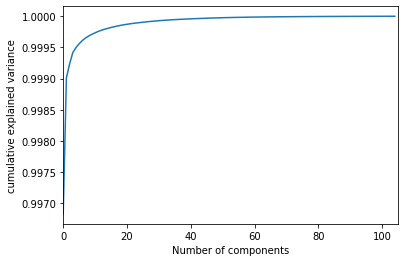

In [ ]:
#principle component analysis for 105 components
pca2 = PCA(n_components=105)
df=pca2.fit_transform(c)

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlim(0,105,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

Text(0, 0.5, 'cumulative explained variance')

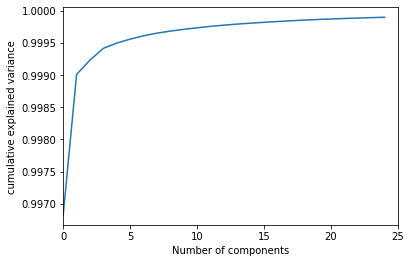

In [ ]:
#principle component analysis for 25 components
pca3 = PCA(n_components=25)
df=pca3.fit_transform(c)

plt.plot(np.cumsum(pca3.explained_variance_ratio_))
plt.xlim(0,25,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
#explained variance for 105 components
explained_variance = pca2.explained_variance_ratio_
explained_variance

array([9.96827727e-01, 2.18133253e-03, 2.23579818e-04, 1.82382329e-04,
       8.19121112e-05, 6.07835499e-05, 5.24593633e-05, 4.08974248e-05,
       3.15350121e-05, 2.78044585e-05, 2.34094365e-05, 2.26846230e-05,
       1.88926583e-05, 1.59737777e-05, 1.45983368e-05, 1.32852700e-05,
       1.24164998e-05, 1.17411712e-05, 1.00731463e-05, 9.42434475e-06,
       7.97462650e-06, 7.86274188e-06, 6.90715036e-06, 6.37666969e-06,
       5.98113560e-06, 5.72899480e-06, 5.63018752e-06, 5.30361913e-06,
       4.76476451e-06, 4.61017679e-06, 4.40818091e-06, 3.93745052e-06,
       3.57799321e-06, 3.35954833e-06, 3.29107388e-06, 3.01454763e-06,
       2.89175660e-06, 2.62801176e-06, 2.46428704e-06, 2.36986107e-06,
       2.32114908e-06, 2.13071337e-06, 2.01006596e-06, 1.94323047e-06,
       1.92465437e-06, 1.87198715e-06, 1.77175600e-06, 1.69175021e-06,
       1.59062660e-06, 1.55114254e-06, 1.48243972e-06, 1.35759409e-06,
       1.26564642e-06, 1.15850873e-06, 1.05236440e-06, 9.86552082e-07,
      

In [ ]:
#explained variance for 25 components
explained_variance = pca3.explained_variance_ratio_
explained_variance

array([9.96827727e-01, 2.18133253e-03, 2.23579818e-04, 1.82382329e-04,
       8.19121112e-05, 6.07835499e-05, 5.24593633e-05, 4.08974248e-05,
       3.15350120e-05, 2.78044585e-05, 2.34094364e-05, 2.26846212e-05,
       1.88926574e-05, 1.59737736e-05, 1.45983354e-05, 1.32852652e-05,
       1.24164774e-05, 1.17410801e-05, 1.00730216e-05, 9.42416280e-06,
       7.97388106e-06, 7.86059004e-06, 6.90587442e-06, 6.37153627e-06,
       5.96866099e-06])

Text(0, 0.5, 'cumulative explained variance')

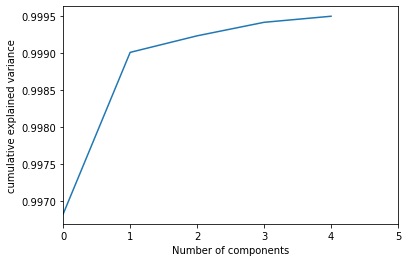

In [ ]:
#principle component analysis for 5 components
pca5 = PCA(n_components=5)
df=pca5.fit_transform(c)

plt.plot(np.cumsum(pca5.explained_variance_ratio_))
plt.xlim(0,5,1)
plt.xlabel('Number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
#explained variance for 5 components
explained_variance = pca5.explained_variance_ratio_
explained_variance

array([9.96827727e-01, 2.18133253e-03, 2.23579818e-04, 1.82382329e-04,
       8.19121112e-05])

In [ ]:
#finding explained variance and printing it
#finding explained variance ratio and printing it
pe= DataFrame(pca5.explained_variance_.round(2), index=['p'+ str(i) for i in range(1,6)], columns=['Explained Variance']).T
per= DataFrame(pca5.explained_variance_ratio_.round(2), index=['p'+ str(i) for i in range(1,6)], columns=['Explained Variance ratio']).T
print(pe)
print(per)

                      p1    p2   p3   p4   p5
Explained Variance  4.73  0.01  0.0  0.0  0.0
                           p1   p2   p3   p4   p5
Explained Variance ratio  1.0  0.0  0.0  0.0  0.0
